In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load dataset from GitHub
url = "https://raw.githubusercontent.com/arienugroho050396/Mall-Customer-Segmentation-Unsupervised-ML/main/Mall_Customers.csv"
data = pd.read_csv(url)

# Show first few rows
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


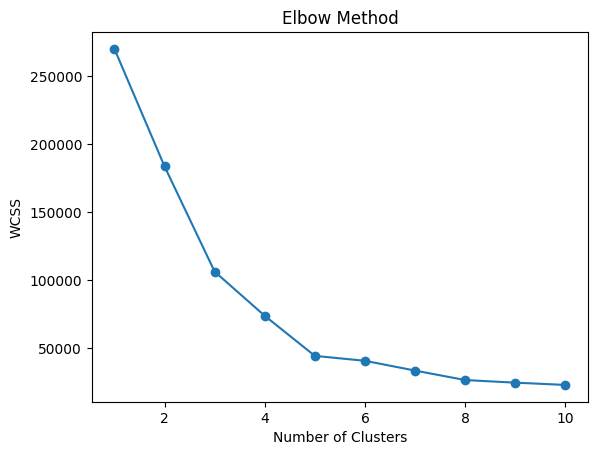

In [ ]:
# Select features
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Elbow method to find optimal K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

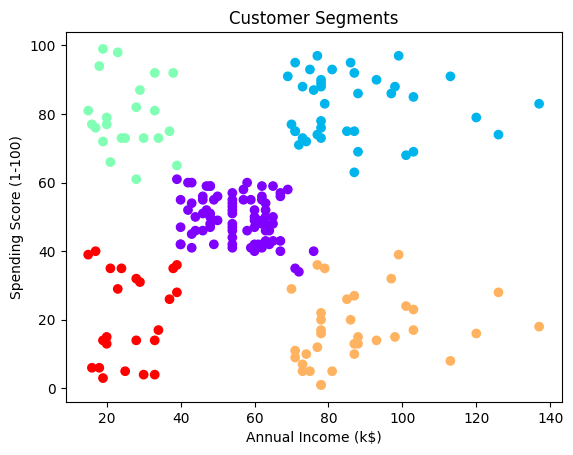

Silhouette Score: 0.553931997444648


In [ ]:
# Apply KMeans with K=5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualize Clusters
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=y_kmeans, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.show()

# Evaluate with Silhouette Score
score = silhouette_score(X, y_kmeans)
print("Silhouette Score:", score)